<a href="https://colab.research.google.com/github/Raissa-hue310/Project-2-Data-Cleaning/blob/main/Project2_Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2: Data Cleaning and Preparation
## **Course:** Data Analytics and Business Intelligence Analyst
##**Student:** Raissa Matho Mekjele

# 1. Setup & Data Loading

In [1]:
# Imports and settings
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

pd.set_option("display.max_columns", 50)
pd.set_option("display.float_format", lambda x: f"{x:,.4f}")


In [2]:
# Load both uploaded CSV files

df_prices = pd.read_csv("/content/historical_stock_prices.csv")
df_stocks = pd.read_csv("/content/historical_stocks.csv")

print("Prices shape:", df_prices.shape)
print("Stocks shape:", df_stocks.shape)

df_prices.head(), df_stocks.head()


Prices shape: (20973889, 8)
Stocks shape: (6460, 5)


(  ticker    open   close  adj_close     low    high   volume        date
 0    AHH 11.5000 11.5800     8.4932 11.2500 11.6800  4633900  2013-05-08
 1    AHH 11.6600 11.5500     8.4712 11.5000 11.6600   275800  2013-05-09
 2    AHH 11.5500 11.6000     8.5078 11.5000 11.6000   277100  2013-05-10
 3    AHH 11.6300 11.6500     8.5445 11.5500 11.6500   147400  2013-05-13
 4    AHH 11.6000 11.5300     8.4565 11.5000 11.6000   184100  2013-05-14,
   ticker exchange                                    name             sector  \
 0    PIH   NASDAQ  1347 PROPERTY INSURANCE HOLDINGS, INC.            FINANCE   
 1  PIHPP   NASDAQ  1347 PROPERTY INSURANCE HOLDINGS, INC.            FINANCE   
 2   TURN   NASDAQ                180 DEGREE CAPITAL CORP.            FINANCE   
 3   FLWS   NASDAQ                 1-800 FLOWERS.COM, INC.  CONSUMER SERVICES   
 4   FCCY   NASDAQ           1ST CONSTITUTION BANCORP (NJ)            FINANCE   
 
                      industry  
 0  PROPERTY-CASUALTY INSURERS  
 

In [3]:
# Standardize column names

df_prices.columns = df_prices.columns.str.lower().str.strip()
df_stocks.columns = df_stocks.columns.str.lower().str.strip()

# Rename common columns
rename_map = {
    "close_price": "close",
    "adj_close_price": "adj_close",
    "open_price": "open",
    "high_price": "high",
    "low_price": "low",
    "ticker_symbol": "ticker"
}

df_prices = df_prices.rename(columns=rename_map)
df_stocks = df_stocks.rename(columns=rename_map)

# Convert date column to datetime
if "date" in df_prices.columns:
    df_prices["date"] = pd.to_datetime(df_prices["date"], errors="coerce")

df_prices.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20973889 entries, 0 to 20973888
Data columns (total 8 columns):
 #   Column     Dtype         
---  ------     -----         
 0   ticker     object        
 1   open       float64       
 2   close      float64       
 3   adj_close  float64       
 4   low        float64       
 5   high       float64       
 6   volume     int64         
 7   date       datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 1.3+ GB


In [4]:
# Merge prices with stock metadata (optional)

df = df_prices.merge(df_stocks, on="ticker", how="left")

print("Merged dataset shape:", df.shape)
df.head()


Merged dataset shape: (20973889, 12)


,ticker,open,close,adj_close,low,high,volume,date,exchange,name,sector,industry
0,AHH,11.5000,11.5800,8.4932,11.2500,11.6800,4633900,2013-05-08,NYSE,"ARMADA HOFFLER PROPERTIES, INC.",FINANCE,REAL ESTATE
1,AHH,11.6600,11.5500,8.4712,11.5000,11.6600,275800,2013-05-09,NYSE,"ARMADA HOFFLER PROPERTIES, INC.",FINANCE,REAL ESTATE
2,AHH,11.5500,11.6000,8.5078,11.5000,11.6000,277100,2013-05-10,NYSE,"ARMADA HOFFLER PROPERTIES, INC.",FINANCE,REAL ESTATE
3,AHH,11.6300,11.6500,8.5445,11.5500,11.6500,147400,2013-05-13,NYSE,"ARMADA HOFFLER PROPERTIES, INC.",FINANCE,REAL ESTATE
4,AHH,11.6000,11.5300,8.4565,11.5000,11.6000,184100,2013-05-14,NYSE,"ARMADA HOFFLER PROPERTIES, INC.",FINANCE,REAL ESTATE


In [5]:
# Sort dataset & overview

df = df.sort_values(["ticker", "date"]).reset_index(drop=True)

print("Final dataset overview:")
print(df.info())
df.head()


Final dataset overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20973889 entries, 0 to 20973888
Data columns (total 12 columns):
 #   Column     Dtype         
---  ------     -----         
 0   ticker     object        
 1   open       float64       
 2   close      float64       
 3   adj_close  float64       
 4   low        float64       
 5   high       float64       
 6   volume     int64         
 7   date       datetime64[ns]
 8   exchange   object        
 9   name       object        
 10  sector     object        
 11  industry   object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(5)
memory usage: 1.9+ GB
None


,ticker,open,close,adj_close,low,high,volume,date,exchange,name,sector,industry
0,A,32.5465,31.4735,27.4950,28.6123,35.7654,62546300,1999-11-18,NYSE,"AGILENT TECHNOLOGIES, INC.",CAPITAL GOODS,BIOTECHNOLOGY: LABORATORY ANALYTICAL INSTRUMENTS
1,A,30.7135,28.8805,25.2298,28.4782,30.7582,15234100,1999-11-19,NYSE,"AGILENT TECHNOLOGIES, INC.",CAPITAL GOODS,BIOTECHNOLOGY: LABORATORY ANALYTICAL INSTRUMENTS
2,A,29.5511,31.4735,27.4950,28.6570,31.4735,6577800,1999-11-22,NYSE,"AGILENT TECHNOLOGIES, INC.",CAPITAL GOODS,BIOTECHNOLOGY: LABORATORY ANALYTICAL INSTRUMENTS
3,A,30.4006,28.6123,24.9954,28.6123,31.2053,5975600,1999-11-23,NYSE,"AGILENT TECHNOLOGIES, INC.",CAPITAL GOODS,BIOTECHNOLOGY: LABORATORY ANALYTICAL INSTRUMENTS
4,A,28.7017,29.3723,25.6594,28.6123,29.9982,4843200,1999-11-24,NYSE,"AGILENT TECHNOLOGIES, INC.",CAPITAL GOODS,BIOTECHNOLOGY: LABORATORY ANALYTICAL INSTRUMENTS


In [6]:
# Select a single ticker for analysis
selected_ticker = "AAPL"   # or MSFT, GOOGL, AMZN, etc.

df = df[df["ticker"] == selected_ticker].reset_index(drop=True)

print("Selected ticker:", selected_ticker)
print("Shape:", df.shape)
df.head()

Selected ticker: AAPL
Shape: (9507, 12)


,ticker,open,close,adj_close,low,high,volume,date,exchange,name,sector,industry
0,AAPL,0.5134,0.5134,0.0232,0.5134,0.5156,117258400,1980-12-12,NASDAQ,APPLE INC.,TECHNOLOGY,COMPUTER MANUFACTURING
1,AAPL,0.4888,0.4866,0.0220,0.4866,0.4888,43971200,1980-12-15,NASDAQ,APPLE INC.,TECHNOLOGY,COMPUTER MANUFACTURING
2,AAPL,0.4531,0.4509,0.0204,0.4509,0.4531,26432000,1980-12-16,NASDAQ,APPLE INC.,TECHNOLOGY,COMPUTER MANUFACTURING
3,AAPL,0.4621,0.4621,0.0209,0.4621,0.4643,21610400,1980-12-17,NASDAQ,APPLE INC.,TECHNOLOGY,COMPUTER MANUFACTURING
4,AAPL,0.4754,0.4754,0.0215,0.4754,0.4777,18362400,1980-12-18,NASDAQ,APPLE INC.,TECHNOLOGY,COMPUTER MANUFACTURING


# 2.ADVANCED DATA CLEANING

In [7]:
# Check missing data

missing_counts = df.isna().sum().sort_values(ascending=False)

print("Missing values per column:")
missing_counts


Missing values per column:


,0
ticker,0
open,0
close,0
adj_close,0
low,0
high,0
volume,0
date,0
exchange,0
name,0


In [8]:
# Clean and validate the date column BEFORE interpolation

# Convert to datetime
df["date"] = pd.to_datetime(df["date"], errors="coerce")

# Remove rows with missing dates
missing_dates = df["date"].isna().sum()
print("Rows with missing date:", missing_dates)

df = df.dropna(subset=["date"]).reset_index(drop=True)

# Sort
df = df.sort_values(["ticker", "date"]).reset_index(drop=True)

df.info()


Rows with missing date: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9507 entries, 0 to 9506
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ticker     9507 non-null   object        
 1   open       9507 non-null   float64       
 2   close      9507 non-null   float64       
 3   adj_close  9507 non-null   float64       
 4   low        9507 non-null   float64       
 5   high       9507 non-null   float64       
 6   volume     9507 non-null   int64         
 7   date       9507 non-null   datetime64[ns]
 8   exchange   9507 non-null   object        
 9   name       9507 non-null   object        
 10  sector     9507 non-null   object        
 11  industry   9507 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(5)
memory usage: 891.4+ KB


In [9]:
# INTERPOLATION

price_cols = ["open", "high", "low", "close", "adj_close"]
volume_col = "volume"

clean_groups = []

# Iterate manually over tickers (avoids pandas index errors completely)
for ticker, group in df.groupby("ticker"):
    group = group.sort_values("date").copy()

    # Set datetime index
    group = group.set_index("date")

    # Interpolate only numeric columns (forces float dtype)
    group[price_cols] = group[price_cols].astype(float).interpolate(
        method="time", limit_direction="both"
    )

    # Forward/backward fill volume
    group[volume_col] = (
        group[volume_col]
        .astype(float)
        .fillna(method="ffill")
        .fillna(method="bfill")
    )

    # Reset index
    group = group.reset_index()

    # Append cleaned group
    clean_groups.append(group)

# Concatenate all groups
df_interpolated = pd.concat(clean_groups, ignore_index=True)

df = df_interpolated.copy()

print("Interpolation complete!")
df.isna().sum()


Interpolation complete!


/tmp/ipython-input-1839866124.py:24: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  .fillna(method="ffill")
/tmp/ipython-input-1839866124.py:25: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  .fillna(method="bfill")


,0
date,0
ticker,0
open,0
close,0
adj_close,0
low,0
high,0
volume,0
exchange,0
name,0


In [10]:
# Outlier capping (IQR method)

def cap_outliers(series, factor=1.5):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - factor * IQR
    upper = Q3 + factor * IQR
    return series.clip(lower=lower, upper=upper)


We will cap outliers for close using the IQR method.
This creates a new cleaned variable: close_capped.

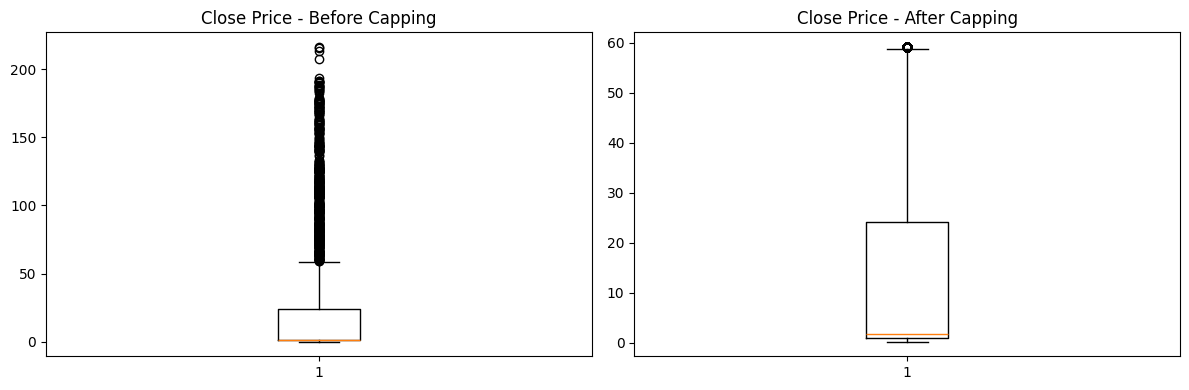

In [11]:
# Cap outliers for close price

df["close_capped"] = cap_outliers(df["close"], factor=1.5)

# Visual check (sample)
sample = df["close"].sample(3000, random_state=42)
sample_capped = df["close_capped"].sample(3000, random_state=42)

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.boxplot(sample)
plt.title("Close Price - Before Capping")

plt.subplot(1,2,2)
plt.boxplot(sample_capped)
plt.title("Close Price - After Capping")

plt.tight_layout()
plt.show()


Volume tends to have extreme spikes, so we apply:

- Log-transform to stabilize variance

- IQR capping on log_volume

- Create a cleaned version: log_volume_capped

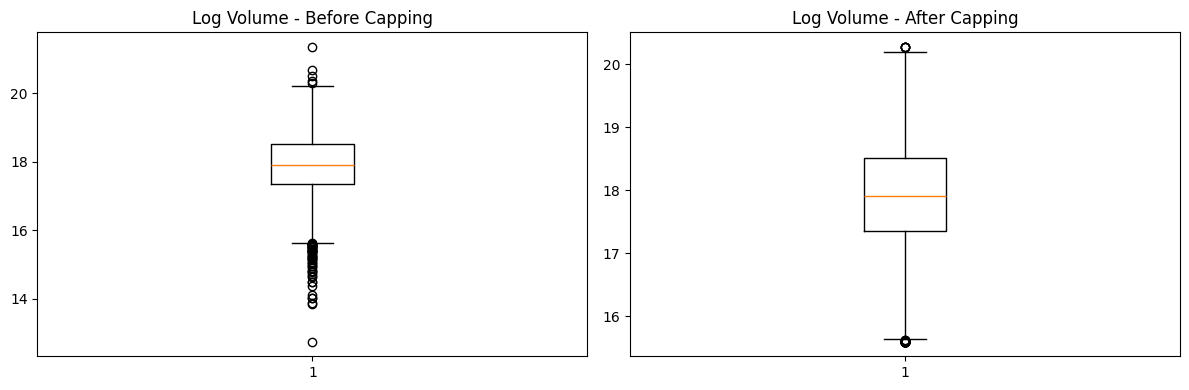

In [12]:
# Outliers for log(volume)

# Ensure volume is positive
df = df[df["volume"] > 0].copy()

# Log-transform volume
df["log_volume"] = np.log(df["volume"])

# Cap outliers in log-volume
df["log_volume_capped"] = cap_outliers(df["log_volume"], factor=1.5)

# Visual check
sample_lv = df["log_volume"].sample(3000, random_state=42)
sample_lv_cap = df["log_volume_capped"].sample(3000, random_state=42)

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.boxplot(sample_lv)
plt.title("Log Volume - Before Capping")

plt.subplot(1,2,2)
plt.boxplot(sample_lv_cap)
plt.title("Log Volume - After Capping")

plt.tight_layout()
plt.show()


We now check the dataset for logically impossible values:

- non-positive prices

- non-positive volume

- duplicate rows

In [13]:
# Look for invalid values

print("Invalid open:", (df["open"] <= 0).sum())
print("Invalid high:", (df["high"] <= 0).sum())
print("Invalid low:", (df["low"] <= 0).sum())
print("Invalid close:", (df["close"] <= 0).sum())
print("Invalid volume:", (df["volume"] <= 0).sum())
print("Duplicate rows:", df.duplicated(subset=["ticker", "date"]).sum())


Invalid open: 0
Invalid high: 0
Invalid low: 0
Invalid close: 0
Invalid volume: 0
Duplicate rows: 0


Now we remove bad rows safely.

In [14]:
# Remove invalid rows on AAPL ticker

clean_groups = []
numeric_price_cols = ["open", "high", "low", "close"]

for ticker, group in df.groupby("ticker"):
    group = group.copy()

    # Remove rows with non-positive prices
    for col in numeric_price_cols:
        group = group[group[col] > 0]

    # Remove non-positive volume
    group = group[group["volume"] > 0]

    # Remove duplicates
    group = group.drop_duplicates(subset=["ticker", "date"], keep="first")

    # Sort again
    group = group.sort_values("date")

    clean_groups.append(group)

# Rebuild the cleaned dataframe
df_cleaned = pd.concat(clean_groups, ignore_index=True)

df = df_cleaned.copy()

print("Shape after removing invalid rows:", df.shape)


Shape after removing invalid rows: (9507, 15)


# 3.Data Transformation
## 1. Feature Engineering

In [15]:
# Sort before feature engineering
df = df.sort_values("date").reset_index(drop=True)
df.head()


,date,ticker,open,close,adj_close,low,high,volume,exchange,name,sector,industry,close_capped,log_volume,log_volume_capped
0,1980-12-12,AAPL,0.5134,0.5134,0.0232,0.5134,0.5156,"117,258,400.0000",NASDAQ,APPLE INC.,TECHNOLOGY,COMPUTER MANUFACTURING,0.5134,18.5799,18.5799
1,1980-12-15,AAPL,0.4888,0.4866,0.0220,0.4866,0.4888,"43,971,200.0000",NASDAQ,APPLE INC.,TECHNOLOGY,COMPUTER MANUFACTURING,0.4866,17.5990,17.5990
2,1980-12-16,AAPL,0.4531,0.4509,0.0204,0.4509,0.4531,"26,432,000.0000",NASDAQ,APPLE INC.,TECHNOLOGY,COMPUTER MANUFACTURING,0.4509,17.0901,17.0901
3,1980-12-17,AAPL,0.4621,0.4621,0.0209,0.4621,0.4643,"21,610,400.0000",NASDAQ,APPLE INC.,TECHNOLOGY,COMPUTER MANUFACTURING,0.4621,16.8887,16.8887
4,1980-12-18,AAPL,0.4754,0.4754,0.0215,0.4754,0.4777,"18,362,400.0000",NASDAQ,APPLE INC.,TECHNOLOGY,COMPUTER MANUFACTURING,0.4754,16.7258,16.7258


In [16]:
# Feature engineering: returns and log returns

df["return"] = df["close"].pct_change()
df["log_return"] = np.log(df["close"]).diff()

df.head()


,date,ticker,open,close,adj_close,low,high,volume,exchange,name,sector,industry,close_capped,log_volume,log_volume_capped,return,log_return
0,1980-12-12,AAPL,0.5134,0.5134,0.0232,0.5134,0.5156,"117,258,400.0000",NASDAQ,APPLE INC.,TECHNOLOGY,COMPUTER MANUFACTURING,0.5134,18.5799,18.5799,NaN,NaN
1,1980-12-15,AAPL,0.4888,0.4866,0.0220,0.4866,0.4888,"43,971,200.0000",NASDAQ,APPLE INC.,TECHNOLOGY,COMPUTER MANUFACTURING,0.4866,17.5990,17.5990,-0.0522,-0.0536
2,1980-12-16,AAPL,0.4531,0.4509,0.0204,0.4509,0.4531,"26,432,000.0000",NASDAQ,APPLE INC.,TECHNOLOGY,COMPUTER MANUFACTURING,0.4509,17.0901,17.0901,-0.0734,-0.0762
3,1980-12-17,AAPL,0.4621,0.4621,0.0209,0.4621,0.4643,"21,610,400.0000",NASDAQ,APPLE INC.,TECHNOLOGY,COMPUTER MANUFACTURING,0.4621,16.8887,16.8887,0.0248,0.0245
4,1980-12-18,AAPL,0.4754,0.4754,0.0215,0.4754,0.4777,"18,362,400.0000",NASDAQ,APPLE INC.,TECHNOLOGY,COMPUTER MANUFACTURING,0.4754,16.7258,16.7258,0.0290,0.0286


In [17]:
# Moving averages (trend features)

df["ma_7"] = df["close"].rolling(window=7, min_periods=1).mean()
df["ma_30"] = df["close"].rolling(window=30, min_periods=1).mean()


In [18]:
# Volatility based on returns (risk feature)

df["volatility_7"] = df["return"].rolling(window=7, min_periods=1).std()


In [19]:
# RSI (14-day Relative Strength Index)

def compute_rsi(series, period=14):
    delta = series.diff()
    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)

    avg_gain = gain.rolling(period).mean()
    avg_loss = loss.rolling(period).mean()

    # Prevent division by zero
    rs = avg_gain / (avg_loss + 1e-9)
    rsi = 100 - (100 / (1 + rs))
    return rsi

df["rsi_14"] = compute_rsi(df["close"], period=14)


In [20]:
# Lag features (good for forecasting)

df["close_lag_1"] = df["close"].shift(1)
df["return_lag_1"] = df["return"].shift(1)


In [21]:
# Drop rows created by rolling windows and lag features
df = df.dropna().reset_index(drop=True)

print("Shape after feature engineering:", df.shape)
df.head()


Shape after feature engineering: (9493, 23)


,date,ticker,open,close,adj_close,low,high,volume,exchange,name,sector,industry,close_capped,log_volume,log_volume_capped,return,log_return,ma_7,ma_30,volatility_7,rsi_14,close_lag_1,return_lag_1
0,1981-01-05,AAPL,0.6049,0.6027,0.0272,0.6027,0.6049,"8,932,000.0000",NASDAQ,APPLE INC.,TECHNOLOGY,COMPUTER MANUFACTURING,0.6027,16.0052,16.0052,-0.0217,-0.0220,0.6161,0.5524,0.0451,64.4928,0.6161,0.0110
1,1981-01-06,AAPL,0.5781,0.5759,0.0260,0.5759,0.5781,"11,289,600.0000",NASDAQ,APPLE INC.,TECHNOLOGY,COMPUTER MANUFACTURING,0.5759,16.2394,16.2394,-0.0444,-0.0455,0.6154,0.5539,0.0460,64.4928,0.6027,-0.0217
2,1981-01-07,AAPL,0.5536,0.5513,0.0249,0.5513,0.5536,"13,921,600.0000",NASDAQ,APPLE INC.,TECHNOLOGY,COMPUTER MANUFACTURING,0.5513,16.4490,16.4490,-0.0426,-0.0436,0.6036,0.5537,0.0235,66.9173,0.5759,-0.0444
3,1981-01-08,AAPL,0.5424,0.5402,0.0244,0.5402,0.5424,"9,956,800.0000",NASDAQ,APPLE INC.,TECHNOLOGY,COMPUTER MANUFACTURING,0.5402,16.1138,16.1138,-0.0202,-0.0205,0.5890,0.5530,0.0184,63.1579,0.5513,-0.0426
4,1981-01-09,AAPL,0.5692,0.5692,0.0257,0.5692,0.5714,"5,376,000.0000",NASDAQ,APPLE INC.,TECHNOLOGY,COMPUTER MANUFACTURING,0.5692,15.4975,15.5944,0.0537,0.0523,0.5807,0.5538,0.0348,65.0000,0.5402,-0.0202


##ENCODING & SCALING

In [22]:
# Encoding ticker as numeric value

df["ticker_encoded"] = pd.factorize(df["ticker"])[0]

df[["ticker", "ticker_encoded"]].head()


,ticker,ticker_encoded
0,AAPL,0
1,AAPL,0
2,AAPL,0
3,AAPL,0
4,AAPL,0


In [23]:
# Select Numeric Columns for Scaling
numeric_cols = [
    "open", "high", "low", "close",
    "close_capped", "log_volume_capped",
    "return", "log_return",
    "ma_7", "ma_30",
    "volatility_7",
    "rsi_14",
    "close_lag_1", "return_lag_1"
]


In [ ]:
# 4. Integration and Formatting for Modeling

## Train / Val / Test Split

We split by date order:

- 70% train

- 15% validation

- 15% test

In [24]:
# Time-based splitting

df = df.sort_values("date").reset_index(drop=True)

unique_dates = df["date"].unique()

n = len(unique_dates)
train_end = int(n * 0.7)
val_end   = int(n * 0.85)

train_dates = unique_dates[:train_end]
val_dates   = unique_dates[train_end:val_end]
test_dates  = unique_dates[val_end:]

train_df = df[df["date"].isin(train_dates)].reset_index(drop=True)
val_df   = df[df["date"].isin(val_dates)].reset_index(drop=True)
test_df  = df[df["date"].isin(test_dates)].reset_index(drop=True)

print("Train:", train_df.shape)
print("Val:", val_df.shape)
print("Test:", test_df.shape)


Train: (6645, 24)
Val: (1424, 24)
Test: (1424, 24)


## Scaling the Numeric Columns

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit on training
scaler.fit(train_df[numeric_cols])

# Transform
train_df_scaled = train_df.copy()
val_df_scaled   = val_df.copy()
test_df_scaled  = test_df.copy()

train_df_scaled[numeric_cols] = scaler.transform(train_df[numeric_cols])
val_df_scaled[numeric_cols]   = scaler.transform(val_df[numeric_cols])
test_df_scaled[numeric_cols]  = scaler.transform(test_df[numeric_cols])


## Check Scaled Data

In [26]:
train_df_scaled[numeric_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
open,"6,645.0000",0.0000,1.0001,-0.7251,-0.4993,-0.2599,-0.0967,5.0894
high,"6,645.0000",-0.0000,1.0001,-0.7297,-0.5014,-0.2597,-0.0968,5.0633
low,"6,645.0000",0.0000,1.0001,-0.7221,-0.4976,-0.2620,-0.0964,5.1150
close,"6,645.0000",0.0000,1.0001,-0.7264,-0.4995,-0.2617,-0.0947,5.0496
close_capped,"6,645.0000",0.0000,1.0001,-0.7264,-0.4995,-0.2617,-0.0947,5.0496
log_volume_capped,"6,645.0000",-0.0000,1.0001,-2.5848,-0.5984,0.0031,0.6342,2.9114
return,"6,645.0000",0.0000,1.0001,-16.2339,-0.5395,-0.0312,0.5157,10.3485
log_return,"6,645.0000",0.0000,1.0001,-22.4447,-0.5179,-0.0145,0.5178,8.7855
ma_7,"6,645.0000",0.0000,1.0001,-0.7239,-0.4988,-0.2615,-0.0958,5.0337
ma_30,"6,645.0000",0.0000,1.0001,-0.7220,-0.5070,-0.2543,-0.0931,4.8375


## SAVING CLEAN DATASETS

In [27]:
# Save the fully cleaned, feature-engineered dataset (not scaled)
df.to_csv("full_clean_dataset.csv", index=False)

print("Saved: full_clean_dataset.csv")


Saved: full_clean_dataset.csv


In [30]:
# Save the scaled datasets

train_df_scaled.to_csv("train_clean_scaled.csv", index=False)
val_df_scaled.to_csv("val_clean_scaled.csv", index=False)
test_df_scaled.to_csv("test_clean_scaled.csv", index=False)

print("Saved:")
print(" - train_clean_scaled.csv")
print(" - val_clean_scaled.csv")
print(" - test_clean_scaled.csv")
print("Files saved successfully")


Saved:
 - train_clean_scaled.csv
 - val_clean_scaled.csv
 - test_clean_scaled.csv
Files saved successfully
